In [1]:
import numpy as np
import struct, os
# import pandas as pd
# import xarray as xr
# import geopandas as gpd
# import regionmask, struct
import matplotlib.pyplot as plt
# import rioxarray
from pyproj import Transformer
import cartopy.crs as ccrs
from xgrads import open_CtlDataset

In [2]:
obj = ccrs.LambertAzimuthalEqualArea(105, 47)
obj_proj = obj.to_string()

transformer = Transformer.from_crs('EPSG:4326', obj_proj)
transformer_inv = Transformer.from_crs(obj_proj, 'EPSG:4326')

workplace = './'

In [3]:
def load_gdat_files(n_rank, ncols=10, nrows = 10, ntime=365, 
                    varname='tair', path = '.', suffix='gdat', 
                    combine_all=False):

    import os

    for i, ii in enumerate(np.arange(n_rank)):

        if n_rank >1:

            bin_sub_path = os.path.join(path, varname + '_'+str(ii)+'.'+suffix)

        else:

            bin_sub_path = os.path.join(path, varname +'.'+suffix)

        with open(bin_sub_path) as f:
            rectype = np.dtype(np.float32)
            bdata = np.fromfile(f, dtype=rectype)
            bdata = np.reshape(bdata, [ntime, int(bdata.shape[0] / ntime)])

        # print(bdata.shape)

        if i == 0: 
            dump = bdata.copy()
        else:
            dump = np.hstack((dump, bdata))

    if ((combine_all) and (n_rank > 1)):

        with open(os.path.join(path, varname+'.'+suffix), 'wb') as file:
            
            for ix in np.arange(dump.shape[0]):
                for iy in dump[ix,:]:
            
                    binary_data = struct.pack("f", iy)
                
                    file.write(binary_data)

    dump0 = np.reshape(dump, [ntime, nrows, ncols])

    return dump0

/opt/miniforge/lib/python3.10/site-packages/xgrads/io.py:216: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da = xr.DataArray(name=v.name, data=data, dims=dims, coords=coords,


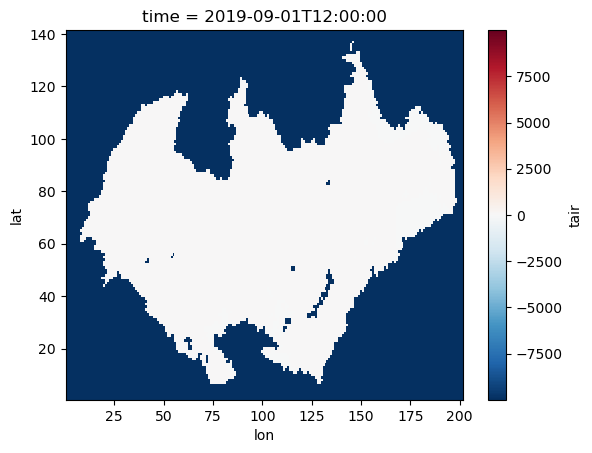

In [11]:
dd0 = open_CtlDataset('ctl_files/wo_assim/tair.ctl')

dd0.tair[0].plot(vmin = -20, vmax = )

In [5]:
data = load_gdat_files(1, ncols=201, nrows=141, ntime=60, 
                       path=workplace+'outputs/wo_assim/',
                       varname='tair', 
                       combine_all=False)

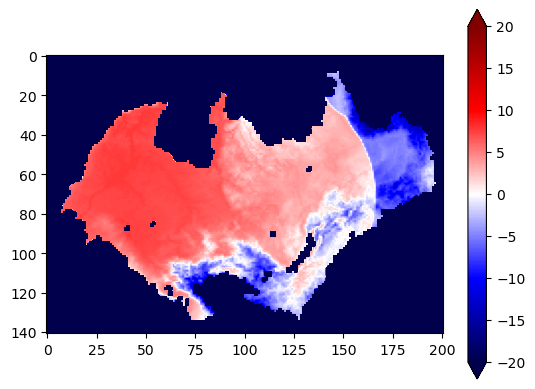

In [6]:
plt.imshow(np.flipud(data[25,:,:]),vmin=-20, vmax=20, cmap = 'seismic')
plt.colorbar(extend = 'both')

In [7]:
data = load_gdat_files(5, ncols=201, nrows=141, ntime=60, 
                       path=workplace+'outputs/wo_assim/',
                       varname='snod', 
                       combine_all=False)

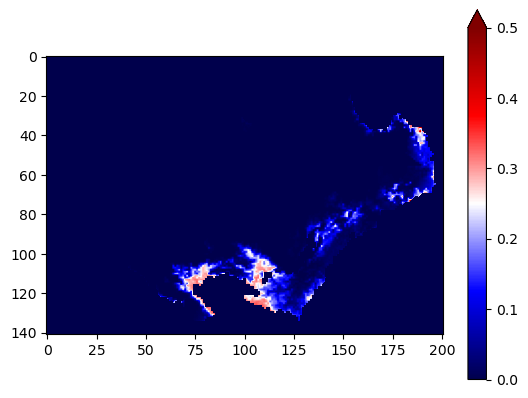

In [8]:
plt.imshow(np.flipud(data[25,:,:]),vmin=0, vmax=0.5, cmap = 'seismic')
plt.colorbar(extend = 'max')